<h1 style="text-align: center;">Predicting Home Wins in La Liga: 
    A Machine Learning Model</h1>


### Importing the Dataset and Viewing the First Few Rows

In [494]:
import pandas as pd

In [3]:
# Loading the La Liga matches dataset from a CSV file
# The first column is used as the index of the DataFrame
matches = pd.read_csv("LaLiga_Matches.csv", index_col=0)

In [5]:
matches.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
Season,,,,,,,,,
1995-96,02-09-1995,La Coruna,Valencia,3,0,H,2.0,0.0,H
1995-96,02-09-1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H
1995-96,03-09-1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H
1995-96,03-09-1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D
1995-96,03-09-1995,Celta,Compostela,0,1,A,0.0,0.0,D


In [7]:
matches.shape        # Displaying the shape of the dataset to check the number of rows and columns

(10883, 9)

In [9]:
38 * 20 * 28             #38 matches, 20 teams, 28 years available 1995-2023

21280

In [11]:
matches["HomeTeam"].value_counts()   #this figures out how many matches we have for each team in the data

HomeTeam
Barcelona      540
Ath Bilbao     540
Valencia       540
Real Madrid    539
Espanol        517
Ath Madrid     501
Sociedad       484
Sevilla        483
Betis          464
Celta          426
Villarreal     422
La Coruna      403
Osasuna        365
Mallorca       364
Getafe         346
Valladolid     346
Malaga         323
Santander      308
Zaragoza       308
Vallecano      274
Levante        266
Alaves         232
Granada        175
Sp Gijon       175
Almeria        138
Eibar          133
Oviedo         118
Tenerife       118
Las Palmas      99
Elche           95
Cadiz           80
Numancia        76
Recreativo      76
Leganes         76
Girona          61
Compostela      61
Salamanca       59
Albacete        59
Extremadura     40
Hercules        40
Merida          40
Murcia          38
Huesca          38
Logrones        21
Gimnastic       19
Xerez           19
Villareal       19
Cordoba         19
Name: count, dtype: int64

In [13]:
# Upon examining the dataset, we notice that the number of matches in the dataset (matches.shape) is fewer than the expected total of 38 matches per team per season, 
# multiplied by 20 teams and 28 years (38 x 20 x 28 = 21,280 matches). 
# This discrepancy arises because not all teams have consistently participated in La Liga over the entire period from 1995 to 2023. 
# Teams may be promoted to or relegated from La Liga, leading to fewer matches recorded for some teams during certain seasons. 
# Additionally, there might be other factors such as missing data or incomplete records in the dataset.

### Data Preprocessing: Cleaning and Converting the 'Date' Column


In [17]:
matches.dtypes

Date         object
HomeTeam     object
AwayTeam     object
FTHG          int64
FTAG          int64
FTR          object
HTHG        float64
HTAG        float64
HTR          object
dtype: object

In [33]:
# Remove leading/trailing spaces
matches["Date"] = matches["Date"].str.strip()

# Convert to datetime with format specified, handle invalid entries
matches["Date"] = pd.to_datetime(matches["Date"], format="%d-%m-%Y", errors="coerce")

# Verify conversion
print(matches.dtypes)

# Optional: Check for missing or invalid dates
print(matches[matches["Date"].isna()])


Date        datetime64[ns]
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
FTR                 object
HTHG               float64
HTAG               float64
HTR                 object
dtype: object
Empty DataFrame
Columns: [Date, HomeTeam, AwayTeam, FTHG, FTAG, FTR, HTHG, HTAG, HTR]
Index: []


### Encoding Categorical Variables and Creating the Target Column


In [54]:
# Encoding the 'FTR' (Full Time Result) column into numerical codes 
matches["FTR_codes"] = matches["FTR"].astype("category").cat.codes

In [56]:
matches

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,FTR_codes
Season,,,,,,,,,,
1995-96,1995-09-02,La Coruna,Valencia,3,0,H,2.0,0.0,H,2
1995-96,1995-09-02,Sp Gijon,Albacete,3,0,H,3.0,0.0,H,2
1995-96,1995-09-03,Ath Bilbao,Santander,4,0,H,2.0,0.0,H,2
1995-96,1995-09-03,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D,2
1995-96,1995-09-03,Celta,Compostela,0,1,A,0.0,0.0,D,0
...,...,...,...,...,...,...,...,...,...,...
2023-24,2023-10-01,Almeria,Granada,3,3,D,3.0,0.0,H,1
2023-24,2023-10-01,Alaves,Osasuna,0,2,A,0.0,1.0,A,0
2023-24,2023-10-01,Ath Madrid,Cadiz,3,2,H,1.0,2.0,A,2


In [65]:
# Encoding the 'AwayTeam' column into numerical codes
matches["AwayTeam_codes"] = matches["AwayTeam"].astype("category").cat.codes

In [69]:
# Encoding the 'HomeTeam' column into numerical codes
matches["HomeTeam_codes"] = matches["HomeTeam"].astype("category").cat.codes

In [71]:
matches

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,FTR_codes,AwayTeam_codes,HomeTeam_codes
Season,,,,,,,,,,,,
1995-96,1995-09-02,La Coruna,Valencia,3,0,H,2.0,0.0,H,2,41,21
1995-96,1995-09-02,Sp Gijon,Albacete,3,0,H,3.0,0.0,H,2,1,39
1995-96,1995-09-03,Ath Bilbao,Santander,4,0,H,2.0,0.0,H,2,36,3
1995-96,1995-09-03,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D,2,38,4
1995-96,1995-09-03,Celta,Compostela,0,1,A,0.0,0.0,D,0,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-24,2023-10-01,Almeria,Granada,3,3,D,3.0,0.0,H,1,18,2
2023-24,2023-10-01,Alaves,Osasuna,0,2,A,0.0,1.0,A,0,31,0
2023-24,2023-10-01,Ath Madrid,Cadiz,3,2,H,1.0,2.0,A,2,7,4


In [73]:
# Creating a binary target variable where 1 represents a home win ('H') and 0 otherwise
matches["target"] = (matches["FTR"] == "H").astype(int)

In [75]:
matches

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,FTR_codes,AwayTeam_codes,HomeTeam_codes,target
Season,,,,,,,,,,,,,
1995-96,1995-09-02,La Coruna,Valencia,3,0,H,2.0,0.0,H,2,41,21,1
1995-96,1995-09-02,Sp Gijon,Albacete,3,0,H,3.0,0.0,H,2,1,39,1
1995-96,1995-09-03,Ath Bilbao,Santander,4,0,H,2.0,0.0,H,2,36,3,1
1995-96,1995-09-03,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D,2,38,4,1
1995-96,1995-09-03,Celta,Compostela,0,1,A,0.0,0.0,D,0,9,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-24,2023-10-01,Almeria,Granada,3,3,D,3.0,0.0,H,1,18,2,0
2023-24,2023-10-01,Alaves,Osasuna,0,2,A,0.0,1.0,A,0,31,0,0
2023-24,2023-10-01,Ath Madrid,Cadiz,3,2,H,1.0,2.0,A,2,7,4,1


# Creating Initial Machine Learning Model

### Building and Evaluating a Random Forest Model for Home Win Prediction


In [78]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rf = RandomForestClassifier(n_estimators = 50, min_samples_split = 10, random_state = 1)

In [502]:
# Splitting the dataset into training and testing sets based on the 'Date' column
train = matches[matches["Date"] < '2020-01-01']
test = matches[matches["Date"] > '2020-01-01']

In [504]:
# Defining the predictor variables (features) to use for training the model
predictors = ["AwayTeam_codes", "HomeTeam_codes", "HTHG", "HTAG"]

# Explanation of Selected Predictors:

- **"AwayTeam_codes"**: This feature represents the encoded team code for the away team. 
  It helps the model understand the influence of specific teams when playing away, 
  as different teams may have distinct patterns in away games.

- **"HomeTeam_codes"**: This feature represents the encoded team code for the home team.
  It captures the impact of playing at home, as home teams often have different performance patterns
  compared to away teams (e.g., home advantage).

- **"HTHG" (Half-time home goals)**: This feature reflects the home team's performance in the first half of the match. 
  Half-time goals are often indicative of how the home team is likely to perform in the second half, 
  which can help predict the final result.

- **"HTAG" (Half-time away goals)**: Similar to "HTHG", this feature captures the away team's first-half performance.
  It helps in understanding how the away team is performing up until halftime, which can influence the final result.

## Why Not Include Full-Time Goals (FTHG and FTAG):

- **"FTHG" (Full-time home goals)** and **"FTAG" (Full-time away goals)** are too directly related to the match outcome. 
  Including these features could lead to overfitting, where the model memorizes specific results 
  rather than learning general patterns. Removing them encourages the model to focus on more subtle, generalizable features
  that still have predictive value but don't provide direct access to the final score.


In [507]:
# Training the Random Forest model using the training data
rf.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [511]:
# Making predictions on the test set
preds = rf.predict(test[predictors])

In [319]:
from sklearn.metrics import accuracy_score

In [509]:
# Combining the actual and predicted values into a DataFrame for further analysis
acc = accuracy_score(test["target"], preds)

In [323]:
acc

0.7307963354474982

In [325]:
combined = pd.DataFrame(dict(actual = test["target"], prediction = preds)) 

In [513]:
# Creating a confusion matrix (cross-tabulation) to visualize actual vs predicted values
pd.crosstab(index = combined["actual"], columns = combined["prediction"])

prediction,0,1
actual,,
0,640,148
1,221,410


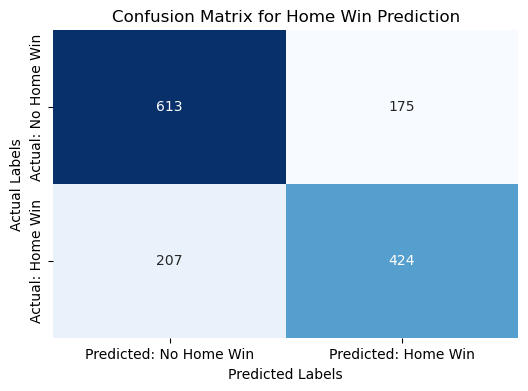

In [517]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(test["target"], preds)

# Create a heatmap for a 2x2 confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=["Predicted: No Home Win", "Predicted: Home Win"],
            yticklabels=["Actual: No Home Win", "Actual: Home Win"])

# Adding labels and title for clarity
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Home Win Prediction')

# Display the plot
plt.show()


In [329]:
from sklearn.metrics import precision_score

In [331]:
precision_score(test["target"], preds)

0.7078464106844741

# Improving Precision With Rolling Averages

In [342]:
# Filter the dataset to include matches where Real Madrid is either the HomeTeam or AwayTeam
group = matches[(matches["HomeTeam"] == "Real Madrid") | (matches["AwayTeam"] == "Real Madrid")]

In [344]:
group

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,FTR_codes,AwayTeam_codes,HomeTeam_codes,target
Season,,,,,,,,,,,,,
1995-96,1995-09-03,Vallecano,Real Madrid,1,5,A,0.0,1.0,A,0,33,43,0
1995-96,1995-09-09,Real Madrid,Ath Bilbao,1,2,A,0.0,0.0,D,0,3,33,0
1995-96,1995-09-17,Real Madrid,Oviedo,2,3,A,2.0,2.0,D,0,32,33,0
1995-96,1995-09-23,Betis,Real Madrid,0,0,D,0.0,0.0,D,1,33,6,0
1995-96,1995-09-30,Real Madrid,Barcelona,1,1,D,1.0,1.0,D,1,5,33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-24,2023-09-02,Real Madrid,Getafe,2,1,H,0.0,1.0,A,2,15,33,1
2023-24,2023-09-17,Real Madrid,Sociedad,2,1,H,0.0,1.0,A,2,38,33,1
2023-24,2023-09-24,Ath Madrid,Real Madrid,3,1,H,2.0,1.0,H,2,33,4,1


In [373]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("Date")
    rolling_stats = group[cols].rolling(3, closed = 'left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset = new_cols)
    return group

In [375]:
cols = ["HTHG",	"HTAG", "FTHG",	"FTAG"]	
new_cols = [f"{c}_rolling" for c in cols]

In [377]:
new_cols

['HTHG_rolling', 'HTAG_rolling', 'FTHG_rolling', 'FTAG_rolling']

In [379]:
rolling_averages(group, cols, new_cols)

,Date,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,FTR_codes,AwayTeam_codes,HomeTeam_codes,target,HTHG_rolling,HTAG_rolling,FTHG_rolling,FTAG_rolling
Season,,,,,,,,,,,,,,,,
1995-96,1995-09-23,Real Madrid,0,0,D,0.0,0.0,D,1,33,6,0,0.666667,1.000000,1.333333,3.333333
1995-96,1995-09-30,Barcelona,1,1,D,1.0,1.0,D,1,5,33,0,0.666667,0.666667,1.000000,1.666667
1995-96,1995-10-04,Real Madrid,4,3,H,3.0,0.0,H,2,33,41,1,1.000000,1.000000,1.000000,1.333333
1995-96,1995-10-08,Compostela,2,1,H,2.0,1.0,H,2,9,33,1,1.333333,0.333333,1.666667,1.333333
1995-96,1995-10-15,Real Madrid,0,2,A,0.0,1.0,A,0,33,35,0,2.000000,0.666667,2.333333,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-24,2023-09-02,Getafe,2,1,H,0.0,1.0,A,2,15,33,1,0.333333,1.000000,0.333333,2.000000
2023-24,2023-09-17,Sociedad,2,1,H,0.0,1.0,A,2,38,33,1,0.333333,0.666667,1.000000,1.666667
2023-24,2023-09-24,Real Madrid,3,1,H,2.0,1.0,H,2,33,4,1,0.000000,0.666667,1.333333,1.000000


In [389]:
matches_rolling = matches.groupby("HomeTeam").apply(lambda x: rolling_averages(x, cols, new_cols))

C:\Users\rinad\AppData\Local\Temp\ipykernel_26352\1172752812.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_rolling = matches.groupby("HomeTeam").apply(lambda x: rolling_averages(x, cols, new_cols))


In [391]:
matches_rolling

Date     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
HomeTeam Season                                                            
Alaves   1998-99 1998-10-25  Extremadura     0     1   A   0.0   1.0   A   
         1998-99 1998-11-08  Real Madrid     1     1   D   1.0   0.0   H   
         1998-99 1998-11-21        Celta     2     0   H   1.0   0.0   H   
         1998-99 1998-12-06     Valencia     0     1   A   0.0   0.0   D   
         1998-99 1998-12-20    Salamanca     1     0   H   0.0   0.0   D   
...                     ...          ...   ...   ...  ..   ...   ...  ..   
Zaragoza 2012-13 2013-04-14    Barcelona     0     3   A   0.0   2.0   A   
         2012-13 2013-04-27     Mallorca     3     2   H   1.0   1.0   D   
         2012-13 2013-05-05    Vallecano     3     0   H   1.0   0.0   H   
         2012-13 2013-05-19   Ath Bilbao     1     2   A   1.0   0.0   H   
         2012-13 2013-06-01   Ath Madrid     1     3   A   0.0   0.0   D   

                  FTR_codes  AwayTeam_codes  HomeTeam_codes  target  \
HomeTeam Season                                                       
Alaves   1998-99          0              14               0       0   
         1998-99          1              33               0       0   
         1998-99          2               8               0       1   
         1998-99          0              41               0       0   
         1998-99          2              35               0       1   
...                     ...             ...             ...     ...   
Zaragoza 2012-13          0               5              47       0   
         2012-13          2              27              47       1   
         2012-13          2              43              47       1   
         2012-13          0               3              47       0   
         2012-13          0               4              47       0   

                  HTHG_rolling  HTAG_rolling  FTHG_rolling  FTAG_rolling  
HomeTeam Season                                                           
Alaves   1998-99      0.000000      0.333333      0.333333      0.333333  
         1998-99      0.000000      0.666667      0.333333      0.666667  
         1998-99      0.333333      0.666667      0.333333      1.000000  
         1998-99      0.666667      0.333333      1.000000      0.666667  
         1998-99      0.666667      0.000000      1.000000      0.666667  
...                        ...           ...           ...           ...  
Zaragoza 2012-13      1.000000      0.666667      1.000000      1.000000  
         2012-13      0.333333      1.000000      0.333333      1.333333  
         2012-13      0.666667      1.333333      1.333333      2.000000  
         2012-13      0.666667      1.000000      2.000000      1.666667  
         2012-13      1.000000      0.333333      2.333333      1.333333  

[10733 rows x 16 columns]

In [393]:
matches_rolling = matches_rolling.droplevel("HomeTeam")

In [395]:
matches_rolling

,Date,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,FTR_codes,AwayTeam_codes,HomeTeam_codes,target,HTHG_rolling,HTAG_rolling,FTHG_rolling,FTAG_rolling
Season,,,,,,,,,,,,,,,,
1998-99,1998-10-25,Extremadura,0,1,A,0.0,1.0,A,0,14,0,0,0.000000,0.333333,0.333333,0.333333
1998-99,1998-11-08,Real Madrid,1,1,D,1.0,0.0,H,1,33,0,0,0.000000,0.666667,0.333333,0.666667
1998-99,1998-11-21,Celta,2,0,H,1.0,0.0,H,2,8,0,1,0.333333,0.666667,0.333333,1.000000
1998-99,1998-12-06,Valencia,0,1,A,0.0,0.0,D,0,41,0,0,0.666667,0.333333,1.000000,0.666667
1998-99,1998-12-20,Salamanca,1,0,H,0.0,0.0,D,2,35,0,1,0.666667,0.000000,1.000000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-13,2013-04-14,Barcelona,0,3,A,0.0,2.0,A,0,5,47,0,1.000000,0.666667,1.000000,1.000000
2012-13,2013-04-27,Mallorca,3,2,H,1.0,1.0,D,2,27,47,1,0.333333,1.000000,0.333333,1.333333
2012-13,2013-05-05,Vallecano,3,0,H,1.0,0.0,H,2,43,47,1,0.666667,1.333333,1.333333,2.000000


In [397]:
matches_rolling.index = range(matches_rolling.shape[0])

In [418]:
matches_rolling

,Date,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,FTR_codes,AwayTeam_codes,HomeTeam_codes,target,HTHG_rolling,HTAG_rolling,FTHG_rolling,FTAG_rolling
0,1998-10-25,Extremadura,0,1,A,0.0,1.0,A,0,14,0,0,0.000000,0.333333,0.333333,0.333333
1,1998-11-08,Real Madrid,1,1,D,1.0,0.0,H,1,33,0,0,0.000000,0.666667,0.333333,0.666667
2,1998-11-21,Celta,2,0,H,1.0,0.0,H,2,8,0,1,0.333333,0.666667,0.333333,1.000000
3,1998-12-06,Valencia,0,1,A,0.0,0.0,D,0,41,0,0,0.666667,0.333333,1.000000,0.666667
4,1998-12-20,Salamanca,1,0,H,0.0,0.0,D,2,35,0,1,0.666667,0.000000,1.000000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10728,2013-04-14,Barcelona,0,3,A,0.0,2.0,A,0,5,47,0,1.000000,0.666667,1.000000,1.000000
10729,2013-04-27,Mallorca,3,2,H,1.0,1.0,D,2,27,47,1,0.333333,1.000000,0.333333,1.333333
10730,2013-05-05,Vallecano,3,0,H,1.0,0.0,H,2,43,47,1,0.666667,1.333333,1.333333,2.000000
10731,2013-05-19,Ath Bilbao,1,2,A,1.0,0.0,H,0,3,47,0,0.666667,1.000000,2.000000,1.666667


# Retaining Machine Learning Model

In [414]:
def make_predictions(data, predictors):
    train = data[data["Date"] < '2020-01-01']
    test = data[data["Date"] > '2020-01-01']
    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual = test["target"], prediction = preds), index=test.index)
    precision = precision_score(test["target"], preds)
    return combined, precision

In [416]:
combined, precision = make_predictions(matches_rolling, predictors + new_cols)

In [420]:
precision

0.7347670250896058

In [422]:
combined

,actual,prediction
177,0,1
178,0,0
179,1,1
180,1,0
181,0,0
...,...,...
10407,0,0
10408,0,0
10409,0,0
10410,1,1


In [484]:
combined = combined.drop(columns=["Date_x", "AwayTeam_x", "FTR_x", "Date_y", "AwayTeam_y", "FTR_y", "HomeTeam_codes_x",	"HomeTeam_codes_y"	], errors="ignore")
print(combined.columns)

Index(['actual', 'prediction', 'Date', 'AwayTeam', 'FTR', 'HomeTeam_codes'], dtype='object')


In [486]:
combined

,actual,prediction,Date,AwayTeam,FTR,HomeTeam_codes
177,0,1,2020-01-05,Betis,D,0
178,0,0,2020-01-25,Villarreal,A,0
179,1,1,2020-02-07,Eibar,H,0
180,1,0,2020-02-23,Ath Bilbao,H,0
181,0,0,2020-03-06,Valencia,D,0
...,...,...,...,...,...,...
10407,0,0,2023-06-04,Ath Madrid,D,45
10408,0,0,2023-08-13,Betis,A,45
10409,0,0,2023-08-27,Barcelona,A,45
10410,1,1,2023-09-17,Almeria,H,45
